# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 568


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #city_url =f"{url}appid={api_keys}&units={units}&q="
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
       # city_weather =  requests.get(city_url + city).json()
        city_weather =  requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']



        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | igrim
Processing Record 3 of Set 1 | west island
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | new norfolk
Processing Record 6 of Set 1 | isafjordur
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | mount gambier
Processing Record 9 of Set 1 | praia da vitoria
Processing Record 10 of Set 1 | thurso
Processing Record 11 of Set 1 | invercargill
Processing Record 12 of Set 1 | bel ombre
Processing Record 13 of Set 1 | kodiak
Processing Record 14 of Set 1 | nadym
Processing Record 15 of Set 1 | taiohae
City not found. Skipping...
Processing Record 16 of Set 1 | fortuna
Processing Record 17 of Set 1 | kenora
Processing Record 18 of Set 1 | mitu
Processing Record 19 of Set 1 | nemuro
Processing Record 20 of Set 1 | edinburgh of the seven seas
Processing Record 21 of Set 1 | east london
Processing Record 22 of S

Processing Record 40 of Set 4 | tibanbang
Processing Record 41 of Set 4 | constantia
Processing Record 42 of Set 4 | newman
Processing Record 43 of Set 4 | new plymouth
Processing Record 44 of Set 4 | ponferrada
Processing Record 45 of Set 4 | tual
Processing Record 46 of Set 4 | nuku'alofa
Processing Record 47 of Set 4 | andergrove
Processing Record 48 of Set 4 | fuvahmulah
City not found. Skipping...
Processing Record 49 of Set 4 | cargados carajos
City not found. Skipping...
Processing Record 0 of Set 5 | pangody
Processing Record 1 of Set 5 | iskateley
Processing Record 2 of Set 5 | guerrero negro
Processing Record 3 of Set 5 | tofol
Processing Record 4 of Set 5 | magadan
Processing Record 5 of Set 5 | severo-yeniseyskiy
Processing Record 6 of Set 5 | dhidhdhoo
Processing Record 7 of Set 5 | karratha
Processing Record 8 of Set 5 | jamjamal
Processing Record 9 of Set 5 | napili-honokowai
Processing Record 10 of Set 5 | monrovia
Processing Record 11 of Set 5 | port sudan
Processing R

Processing Record 30 of Set 8 | kone
Processing Record 31 of Set 8 | santiago de cao
Processing Record 32 of Set 8 | kuching
Processing Record 33 of Set 8 | sodra sandby
Processing Record 34 of Set 8 | talakan
Processing Record 35 of Set 8 | acapulco de juarez
Processing Record 36 of Set 8 | 'ohonua
City not found. Skipping...
Processing Record 37 of Set 8 | fort mcmurray
Processing Record 38 of Set 8 | horta
Processing Record 39 of Set 8 | usogorsk
Processing Record 40 of Set 8 | island harbour
Processing Record 41 of Set 8 | medyn'
Processing Record 42 of Set 8 | malmberget
Processing Record 43 of Set 8 | ascension
Processing Record 44 of Set 8 | urumqi
Processing Record 45 of Set 8 | brookings
Processing Record 46 of Set 8 | domerat
Processing Record 47 of Set 8 | badger
Processing Record 48 of Set 8 | ajuchitlan del progreso
Processing Record 49 of Set 8 | maua
Processing Record 0 of Set 9 | bhamo
Processing Record 1 of Set 9 | nyala
Processing Record 2 of Set 9 | marsh harbour
Pro

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          548
Lat           548
Lng           548
Max Temp      548
Humidity      548
Cloudiness    548
Wind Speed    548
Country       548
Date          548
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,4.67,83,100,7.89,TF,1701903496
1,igrim,63.1906,64.4162,-37.40,98,9,1.07,RU,1701903496
2,west island,-12.1568,96.8225,25.99,94,75,7.20,CC,1701903496
3,waitangi,-43.9535,-176.5597,15.46,98,100,7.15,NZ,1701903497
4,new norfolk,-42.7826,147.0587,19.84,48,100,2.76,AU,1701903497


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,4.67,83,100,7.89,TF,1701903496
1,igrim,63.1906,64.4162,-37.40,98,9,1.07,RU,1701903496
2,west island,-12.1568,96.8225,25.99,94,75,7.20,CC,1701903496
3,waitangi,-43.9535,-176.5597,15.46,98,100,7.15,NZ,1701903497
4,new norfolk,-42.7826,147.0587,19.84,48,100,2.76,AU,1701903497


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

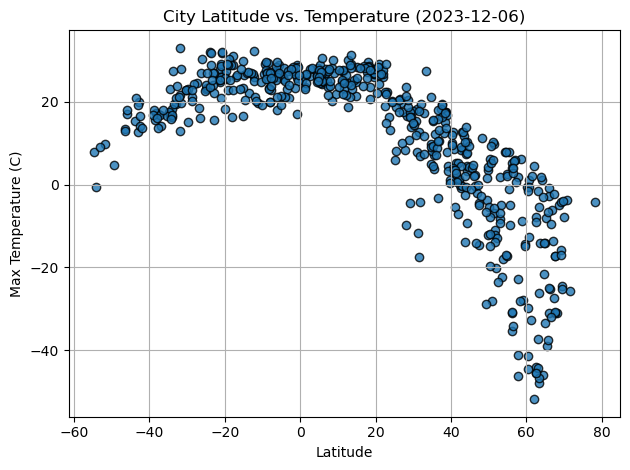

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha=0.8, edgecolors="k")


#Format date
date = time.strftime("%Y-%m-%d")



# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude vs. Temperature ({date})")
plt.grid(True) 
plt.tight_layout()
 

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

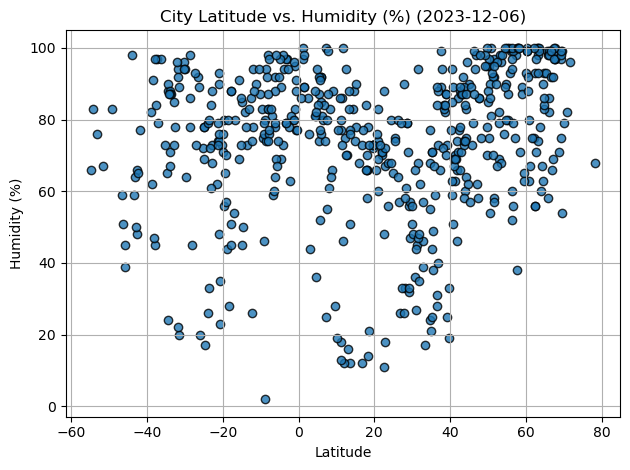

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], alpha=.8, edgecolors="k")

#Format date
date = time.strftime("%Y-%m-%d")


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity (%) ({date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

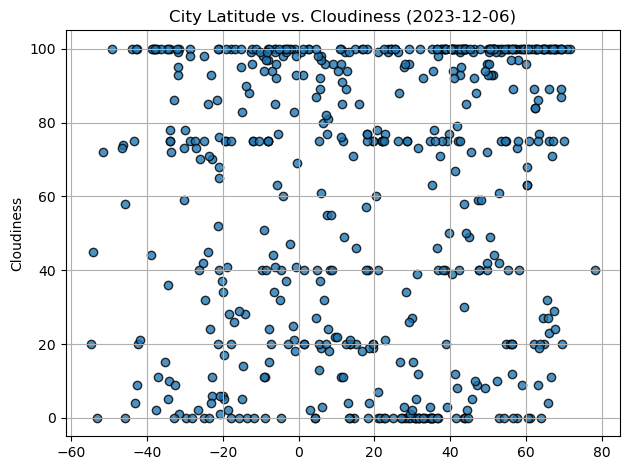

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], alpha=.8, edgecolors="k")

#Format date
date = time.strftime("%Y-%m-%d")


# Incorporate the other graph properties
# plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.grid(True) 
plt.tight_layout()


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

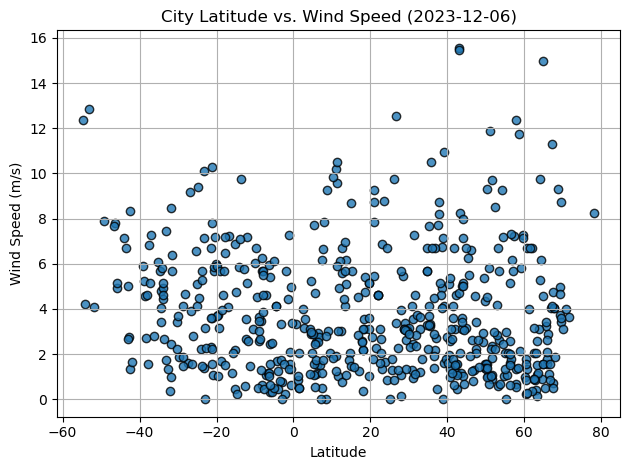

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], alpha=.8, edgecolors="k")

#Format date
date = time.strftime("%Y-%m-%d")



# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.grid(True) 
plt.tight_layout()


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots

#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) > 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,igrim,63.1906,64.4162,-37.40,98,9,1.07,RU,1701903496
5,isafjordur,66.0755,-23.1240,-2.85,82,23,2.87,IS,1701903497
6,bethel,41.3712,-73.4140,2.42,70,100,3.60,US,1701903497
8,praia da vitoria,38.7333,-27.0667,17.64,82,40,6.72,PT,1701903498
9,thurso,58.5927,-3.5259,6.14,71,100,11.75,GB,1701903498


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) < 0, :]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,4.67,83,100,7.89,TF,1701903496
2,west island,-12.1568,96.8225,25.99,94,75,7.20,CC,1701903496
3,waitangi,-43.9535,-176.5597,15.46,98,100,7.15,NZ,1701903497
4,new norfolk,-42.7826,147.0587,19.84,48,100,2.76,AU,1701903497
7,mount gambier,-37.8333,140.7667,17.02,45,100,1.56,AU,1701903498


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8308045259755829
-----------------------------------
My observations of the linear relationship:
The regression displays a strong positive relationship between temperature and latitude
In the northern hemisphere, as the latitude increases the distance from the equator increases


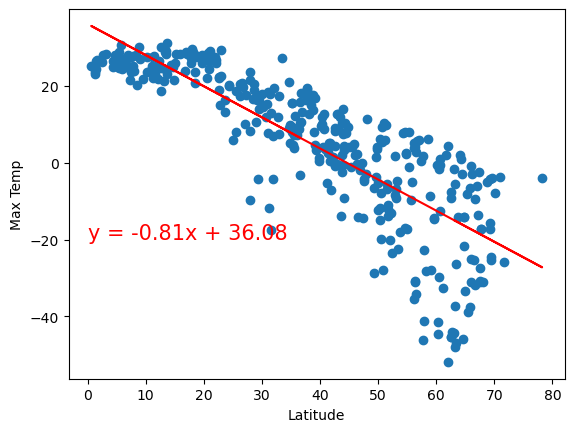

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(0,-20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f'The r-value is {rvalue}')
print("-----------------------------------")
print("My observations of the linear relationship:")
print("The regression displays a strong positive relationship between temperature and latitude")
print("In the northern hemisphere, as the latitude increases the distance from the equator increases")

The r-value is 0.6468489886848041
-----------------------------------
The observations on the linear relationship:
The regression displays a strong positive relationship between temperature and latitude.
The closer to you get to the equator, the max temperature actually increases.


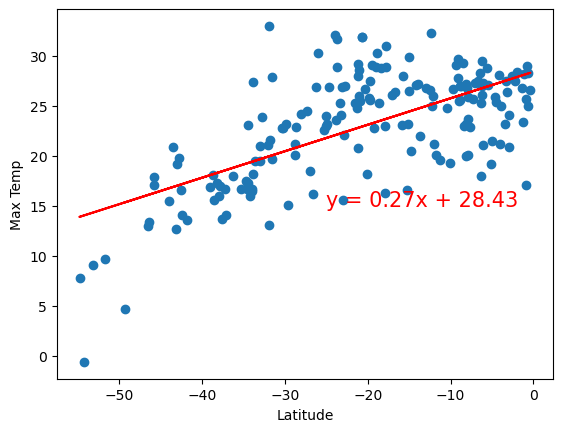

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f'The r-value is {rvalue}')
print("-----------------------------------")
print("The observations on the linear relationship:")
print("The regression displays a strong positive relationship between temperature and latitude.")
print("The closer to you get to the equator, the max temperature actually increases.")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.3050539614111687
-----------------------------------
The observation about linear relationship:
The relationship is slightly weak positive correlation between humidity and latitude.


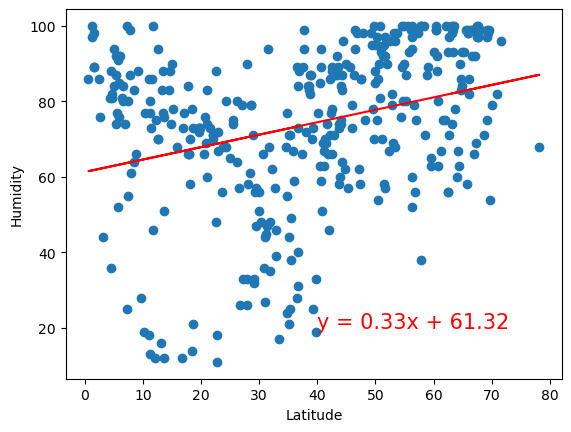

In [19]:
# Northern Hemisphere
# # Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f'The r-value is {rvalue}')
print("-----------------------------------")
print("The observation about linear relationship:")
print("The relationship is slightly weak positive correlation between humidity and latitude.")

The r-value is 0.1930411895489767
-----------------------------------
Observations about linear relationship:
There is a slightly positive relationship.
The humidity increases with respect to cities getting closer to the equator.


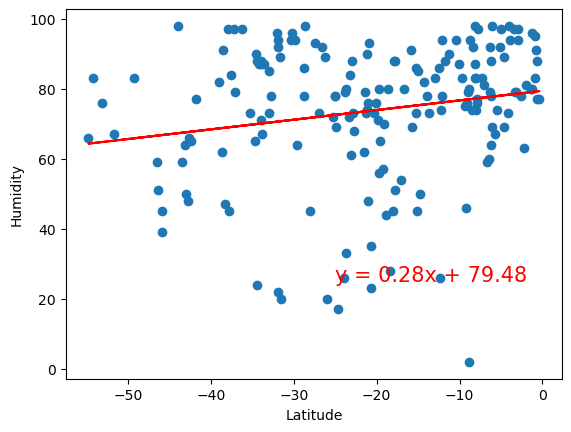

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f'The r-value is {rvalue}')
print("-----------------------------------")
print("Observations about linear relationship:")
print("There is a slightly positive relationship.")
print("The humidity increases with respect to cities getting closer to the equator.")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.1919683212180764
-----------------------------------
For my observations on linear relationship:
For correlation between latitude and cloudiness it does not exist.


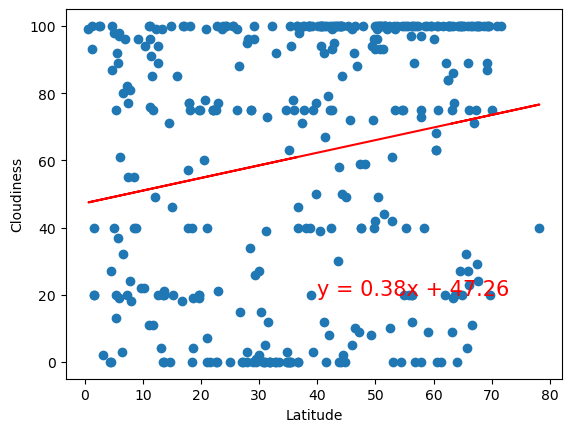

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f'The r-value is {rvalue}')
print("-----------------------------------")
print("For my observations on linear relationship:")
print("For correlation between latitude and cloudiness it does not exist.")

The r-value is 0.08624752895343141
-----------------------------------
My observations of the linear relationship:
Again between latitude and cloudiness very weak correlation exist.


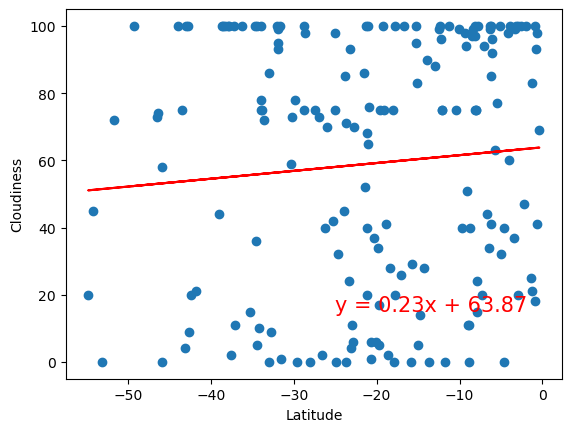

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f'The r-value is {rvalue}')
print("-----------------------------------")
print("My observations of the linear relationship:")
print("Again between latitude and cloudiness very weak correlation exist.")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.009078830761547097
-----------------------------------
My observations on the linear relationship:
Between latitude and wind speed no correlation seems to appear.


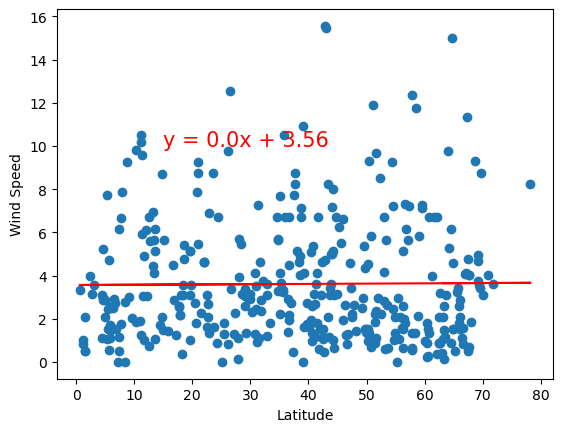

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(15,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f'The r-value is {rvalue}')
print("-----------------------------------")
print("My observations on the linear relationship:")
print("Between latitude and wind speed no correlation seems to appear.")

The r-value is -0.36179297049367587
-----------------------------------
My observations on the linear relationship:
Between latitude and wind speed no correlation seems to appear.


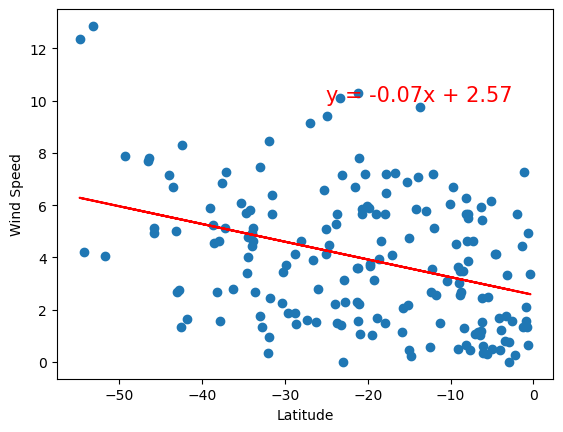

In [25]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f'The r-value is {rvalue}')
print("-----------------------------------")
print("My observations on the linear relationship:")
print("Between latitude and wind speed no correlation seems to appear.")

**Discussion about the linear relationship:** YOUR RESPONSE HERE